# Scikit-Learn API

## Introduction

[API design for machine learning software: experiences from the scikit-learn project](https://arxiv.org/abs/1309.0238)

Extract from the paper

## General principles

* **Consistency**. All objects (basic or composite) share a consistent interface composed of a limited set of methods. This interface is documented in a consistent manner for all objects. 

* **Inspection**. Constructor parameters and parameter values determined by learning algorithms are stored and exposed as public attributes. 

* **Non-proliferation of classes**. Learning algorithms are the only objects to be represented using custom classes. Datasets are represented as NumPy arrays or SciPy sparse matrices. Hyper-parameter names and values are represented as standard Python strings or numbers whenever possible. This keeps scikitlearn easy to use and easy to combine with other libraries. 

* **Composition**. Many machine learning tasks are expressible as sequences or combinations of transformations to data. Some learning algorithms are also naturally viewed as meta-algorithms parametrized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing building blocks. 

* **Sensible defaults**. Whenever an operation requires a user-deﬁned parameter, an appropriate default value is deﬁned by the library. The default value should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand).



## Basic Steps of Using Scikit-Learn API

1. Choose a class of model
2. Choose model hyperparameters
3. Arrage data into features matrix and target array
4. Fit model to data
5. Apply trained model to new data



## Let's look at the simplest of example: Linear Regression

Python comes with random number generated installed. The random number generator generates uniformly distributed random numbers between 0 to 1.

The following example is to illustrate Python Numpy library's random number generation capability. It is not related to later example.

In [1]:
import pandas as pd    # Import Pandas
import numpy as np     # Import Numpy, 
import seaborn as sns  # Import Seaborn, visualisation library
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

0.49645889162008944
0.2895911034398418
0.9999779517807228
7.2449638492178e-05


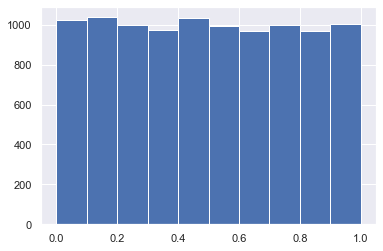

In [2]:
generate_random = np.random.RandomState(0)
res = generate_random.rand(10000)    # Let's generate 10,000 random numbers
print(res.mean())    # Calculate the mean 
print(res.std())     # Calculate the standard deviation
print(res.max())
print(res.min())
plt.hist(res);       # Plot the histogram to visualise

Note the uniform distribution.

***

# Modelling - Linear Regression with Scikit Learn

Let's generate 100 random numbers and multiple them by 10. This will be our `x`.

In [3]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(100)

The relationship between x and y is hence,

$y = 3x + \epsilon$

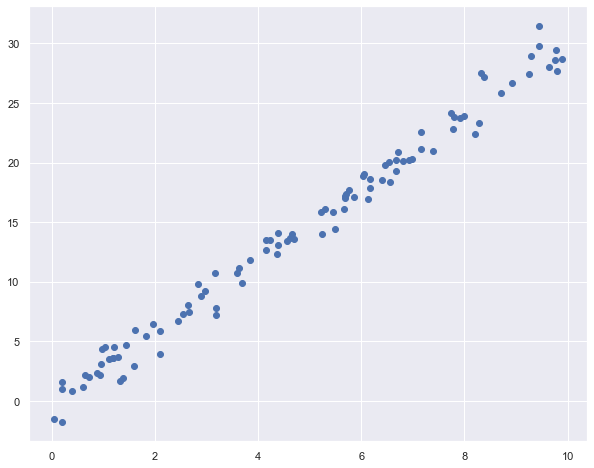

In [4]:
y = 3 * x + np.random.randn(100)
plt.figure(figsize = (10, 8))
sns.set(color_codes=True)
plt.scatter(x, y);

### Step 1. Choose a class of model

In [5]:
from sklearn.linear_model import LinearRegression

### Step 2. Choose model hyperparameters

In [6]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Step 3. Arrange data into features matrix and target array

In [7]:
x.shape

(100,)

In [8]:
x[:10]

array([5.48813504, 7.15189366, 6.02763376, 5.44883183, 4.23654799,
       6.45894113, 4.37587211, 8.91773001, 9.63662761, 3.83441519])

Note the shape of the variable. It is not of the form scikit learn can accept.

We need to reshape this to the format scikit learn api can accept.

In [9]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

In [10]:
X[:10]

array([[5.48813504],
       [7.15189366],
       [6.02763376],
       [5.44883183],
       [4.23654799],
       [6.45894113],
       [4.37587211],
       [8.91773001],
       [9.63662761],
       [3.83441519]])

We have only reshaped the data. The underlying data remained unchanged.

### Step 4. Fit model to data

In [11]:
model.fit(X, y)

LinearRegression()

### Step 5. Apply trained model to new data

Let's generate a evenly distributed number between -1 and 11 using numpy **linspace** method

In [12]:
x_fit = np.linspace(-1, 11)

In [13]:
x_fit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [14]:
X_fit = x_fit.reshape(-1,1)    # convert it to vector, the format 
                               # that scikit learn expect

In [15]:
y_fit = model.predict(X_fit)

### Visualise

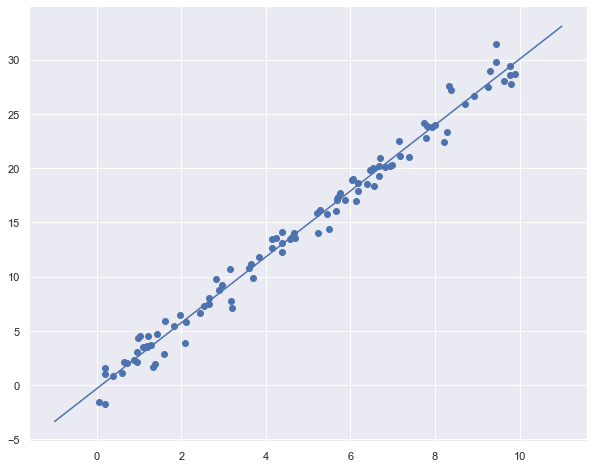

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)
plt.plot(x_fit, y_fit);

Notice that the model produced a line of best fit. The straight line is generated from the scikit-learn linear regression model.